### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from bs4 import BeautifulSoup
from urllib.request import Request,urlopen
import requests

### Get the list of different genre 

In [2]:
genre_url = 'https://www.amazon.in/gp/bestsellers/books/'
response = requests.get(genre_url)

In [3]:
response

<Response [200]>

In [4]:
page_source= BeautifulSoup(response.text,'html.parser')

In [5]:
len(page_source)

7

In [6]:
div_tag=page_source.findAll('div',{'class':'_p13n-zg-nav-tree-all_style_zg-browse-group__88fbz'})
div_tag

[<div class="_p13n-zg-nav-tree-all_style_zg-browse-group__88fbz"><div class="_p13n-zg-nav-tree-all_style_zg-browse-item__1rdKf _p13n-zg-nav-tree-all_style_zg-browse-height-large__1z5B8" role="treeitem"><span class="_p13n-zg-nav-tree-all_style_zg-selected__1SfhQ">Books</span></div><div class="_p13n-zg-nav-tree-all_style_zg-browse-group__88fbz" role="group"><div class="_p13n-zg-nav-tree-all_style_zg-browse-item__1rdKf _p13n-zg-nav-tree-all_style_zg-browse-height-large__1z5B8" role="treeitem"><a href="/gp/bestsellers/books/1318158031">Action &amp; Adventure</a></div><div class="_p13n-zg-nav-tree-all_style_zg-browse-item__1rdKf _p13n-zg-nav-tree-all_style_zg-browse-height-large__1z5B8" role="treeitem"><a href="/gp/bestsellers/books/1318052031">Arts, Film &amp; Photography</a></div><div class="_p13n-zg-nav-tree-all_style_zg-browse-item__1rdKf _p13n-zg-nav-tree-all_style_zg-browse-height-large__1z5B8" role="treeitem"><a href="/gp/bestsellers/books/1318064031">Biographies, Diaries &amp; True 

In [7]:
len(div_tag)

2

In [8]:
a_tag=div_tag[0].findAll('a')

In [9]:
genere_title=[]

for i in range(len(a_tag)):
    genere_title.append(a_tag[i].text)
print(genere_title)

['Action & Adventure', 'Arts, Film & Photography', 'Biographies, Diaries & True Accounts', 'Business & Economics', "Children's Books", 'Comics & Mangas', 'Computing, Internet & Digital Media', 'Crafts, Home & Lifestyle', 'Crime, Thriller & Mystery', 'Engineering', 'Exam Preparation', 'Fantasy, Horror & Science Fiction', 'Health, Family & Personal Development', 'Health, Fitness & Nutrition', 'Higher Education Textbooks', 'Historical Fiction', 'History', 'Humour', 'Language, Linguistics & Writing', 'Law', 'Literature & Fiction', 'Maps & Atlases', 'Medicine & Health Sciences', 'Politics', 'Reference', 'Religion', 'Romance', 'School Books', 'Science & Mathematics', 'Sciences, Technology & Medicine', 'Society & Social Sciences', 'Sports', 'Teen & Young Adult', 'Textbooks & Study Guides', 'Travel']


In [10]:
genere_url=[]
base_url = 'http://amazon.in'

for i in range(len(a_tag)):
    genere_url.append(base_url + a_tag[i]['href'])
print(genere_url)

['http://amazon.in/gp/bestsellers/books/1318158031', 'http://amazon.in/gp/bestsellers/books/1318052031', 'http://amazon.in/gp/bestsellers/books/1318064031', 'http://amazon.in/gp/bestsellers/books/1318068031', 'http://amazon.in/gp/bestsellers/books/64619755031', 'http://amazon.in/gp/bestsellers/books/1318104031', 'http://amazon.in/gp/bestsellers/books/1318105031', 'http://amazon.in/gp/bestsellers/books/1318118031', 'http://amazon.in/gp/bestsellers/books/1318161031', 'http://amazon.in/gp/bestsellers/books/22960344031', 'http://amazon.in/gp/bestsellers/books/4149751031', 'http://amazon.in/gp/bestsellers/books/1402038031', 'http://amazon.in/gp/bestsellers/books/1318128031', 'http://amazon.in/gp/bestsellers/books/23033693031', 'http://amazon.in/gp/bestsellers/books/4149418031', 'http://amazon.in/gp/bestsellers/books/1318164031', 'http://amazon.in/gp/bestsellers/books/4149493031', 'http://amazon.in/gp/bestsellers/books/1318143031', 'http://amazon.in/gp/bestsellers/books/1318144031', 'http://

In [11]:
genre_df = pd.DataFrame(columns=['Genere title', 'Genere url'])
genre_df

,Genere title,Genere url


In [12]:
genre_df['Genere title']=genere_title
genre_df['Genere url']=genere_url

### Below is list of Genere and link for top 50 books for each of the genere

In [13]:
genre_df

,Genere title,Genere url
0,Action & Adventure,http://amazon.in/gp/bestsellers/books/1318158031
1,"Arts, Film & Photography",http://amazon.in/gp/bestsellers/books/1318052031
2,"Biographies, Diaries & True Accounts",http://amazon.in/gp/bestsellers/books/1318064031
3,Business & Economics,http://amazon.in/gp/bestsellers/books/1318068031
4,Children's Books,http://amazon.in/gp/bestsellers/books/64619755031
5,Comics & Mangas,http://amazon.in/gp/bestsellers/books/1318104031
6,"Computing, Internet & Digital Media",http://amazon.in/gp/bestsellers/books/1318105031
7,"Crafts, Home & Lifestyle",http://amazon.in/gp/bestsellers/books/1318118031
8,"Crime, Thriller & Mystery",http://amazon.in/gp/bestsellers/books/1318161031
9,Engineering,http://amazon.in/gp/bestsellers/books/22960344031


#### Now we will focus on scraping and performing data analysis on the 'Action & Adventure' genre books.
#### Outline
#### 1) Here we will scrap dataset for 5 genere that is 'Action & Adventure','Computing, Internet & Digital Media','Historical Fiction','Science & Mathematics	','Politics'

In [14]:
# Links 
#1) Action & Adventure
genre_Book_url1='https://www.amazon.in/gp/bestsellers/books/1318158031/ref=zg_bs_nav_books_1'

#2) Computing, Internet & Digital Media
genre_Book_url2='https://www.amazon.in/gp/bestsellers/books/1318105031/ref=zg_bs_nav_books_1_1318158031'

#3) Historical Fiction
genre_Book_url3='https://www.amazon.in/gp/bestsellers/books/1318164031/ref=zg_bs_nav_books_1'

#4) Science & Mathematics
genre_Book_url4='https://www.amazon.in/gp/bestsellers/books/4149708031/ref=zg_bs_nav_books_1'

#5) Politics
genre_Book_url5='https://www.amazon.in/gp/bestsellers/books/1318176031/ref=zg_bs_nav_books_1'

In [20]:
#syntax to extract name
name=div_tag[0].find('div', {'class' : '_cDEzb_p13n-sc-css-line-clamp-1_1Fn1y'})
name.text

"Harry Potter and the Philosopher's Stone"

In [21]:
#syntax to extract author name
author=div_tag[0].find('a', {'class' : 'a-size-small a-link-child'})
author.text

'J.K. Rowling'

In [22]:
#syntax to extract rating
rating=div_tag[0].find('span', {'class' : 'a-icon-alt'})
rating.text.split()[0]

'4.7'

In [23]:
#syntax to extract booktype
booktype=div_tag[0].find('span', {'class' : 'a-size-small a-color-secondary a-text-normal'})
booktype.text

'Kindle Edition'

In [24]:
#syntax to extract price
price=div_tag[0].find('span', {'class' : 'p13n-sc-price'})
price.text

'₹313.95'

In [25]:
review=div_tag[25].find('div', {'class' : 'a-icon-row'})
review.find('span', {'class' : 'a-size-small'}).text

'75,534'

In [16]:
def scrape_book_data(div_tag):
    name_list = []
    author_list = []
    review_list = []
    price_list = []
    book_type_list = []
    rating_list = []

    for i in range(len(div_tag)):
        # Extract book names
        name = div_tag[i].find('div', {'class': '_cDEzb_p13n-sc-css-line-clamp-1_1Fn1y'})
        if name is not None:
            name_list.append(name.text)
        else:
            name_list.append('Missing')

        # Extract authors
        author = div_tag[i].find('a', {'class': 'a-size-small a-link-child'})
        if author is not None:
            author_list.append(author.text)
        else:
            author_list.append('Missing')

        # Extract reviews
        review = div_tag[i].find('div', {'class': 'a-icon-row'})
        if review:
            review_final = review.find('span', {'class': 'a-size-small'})
            review_list.append(review_final.text.replace(",", "") if review_final else 'Missing')
        else:
            review_list.append('Missing')

        # Extract prices
        price = div_tag[i].find('span', {'class': 'p13n-sc-price'})
        if price:
            price_list.append(price.text)
        else:
            price_list.append('Missing')

        # Extract book types
        booktype = div_tag[i].find('span', {'class': 'a-size-small a-color-secondary a-text-normal'})
        if booktype:
            book_type_list.append(booktype.text)
        else:
            book_type_list.append('Missing')

        # Extract book types
        rating = div_tag[i].find('span', {'class' : 'a-icon-alt'})
        if rating:
            rating_list.append(rating.text.split()[0])
        else:
            rating_list.append('Missing')

    return name_list, author_list, review_list, price_list, book_type_list,rating_list

In [17]:
genre_books_dict = {
    'Book_Name':[],
    'Author_Name':[],
    'Book_Type':[],
    'Price':[],
    'Star_Rating':[],
    'Reviews':[]
}

### 1) Creating Dataframe for Action & Adventure books

In [18]:
response = requests.get(genre_Book_url1)
book_source= BeautifulSoup(response.text,'html.parser')
div_tag=book_source.findAll('div',{'class':'zg-grid-general-faceout'})

In [26]:
name_list, author_list, review_list, price_list, book_type_list,rating_list = scrape_book_data(div_tag)

In [27]:
df_Action_Adventure=pd.DataFrame(columns=['Book_Name','Author_Name','Book_Type','Price','Star_Rating','Reviews'])
df_Action_Adventure

,Book_Name,Author_Name,Book_Type,Price,Star_Rating,Reviews


In [28]:
df_Action_Adventure['Book_Name']=name_list
df_Action_Adventure['Author_Name']=author_list
df_Action_Adventure['Book_Type']=book_type_list
df_Action_Adventure['Price']=price_list
df_Action_Adventure['Star_Rating']=rating_list
df_Action_Adventure['Reviews']=review_list


In [29]:
df_Action_Adventure.head(3)

,Book_Name,Author_Name,Book_Type,Price,Star_Rating,Reviews
0,Harry Potter and the Philosopher's Stone,J.K. Rowling,Kindle Edition,₹313.95,4.7,67162
1,"THE SILENT PATIENT [Paperback] Michaelides, Alex",Alex Michaelides,Paperback,₹255.00,4.5,318820
2,The Naga Warriors 1: Battle of Gokul Vol 1 | F...,Akshat Gupta,Paperback,₹184.00,4.6,296


### 2) Creating Dataframe for Computing, Internet & Digital Media

In [30]:
response = requests.get(genre_Book_url2)
book_source= BeautifulSoup(response.text,'html.parser')
div_tag=book_source.findAll('div',{'class':'zg-grid-general-faceout'})

In [31]:
name_list, author_list, review_list, price_list, book_type_list,rating_list = scrape_book_data(div_tag)

In [32]:
df_Computing_Internet=pd.DataFrame(columns=['Book_Name','Author_Name','Book_Type','Price','Star_Rating','Reviews'])

In [33]:
df_Computing_Internet['Book_Name']=name_list
df_Computing_Internet['Author_Name']=author_list
df_Computing_Internet['Book_Type']=book_type_list
df_Computing_Internet['Price']=price_list
df_Computing_Internet['Star_Rating']=rating_list
df_Computing_Internet['Reviews']=review_list

In [34]:
df_Computing_Internet.head(3)

,Book_Name,Author_Name,Book_Type,Price,Star_Rating,Reviews
0,Make Epic Money: More than one lakh copies sol...,Ankur Warikoo,Hardcover,₹255.00,4.4,606
1,"Let's Talk Mutual Funds : A Systematic, Smart ...",Monika Halan,Paperback,₹270.00,4.6,650
2,Mastering the Data Paradox : Key to Winning in...,Nitin Seth,Hardcover,₹505.00,4.8,417


### 3) Creating Dataframe for Historical Fiction

In [35]:
response = requests.get(genre_Book_url3)
book_source= BeautifulSoup(response.text,'html.parser')
div_tag=book_source.findAll('div',{'class':'zg-grid-general-faceout'})

In [36]:
name_list, author_list, review_list, price_list, book_type_list,rating_list = scrape_book_data(div_tag)

In [37]:
df_Historical_Fiction=pd.DataFrame(columns=['Book_Name','Author_Name','Book_Type','Price','Star_Rating','Reviews'])

In [38]:
df_Historical_Fiction['Book_Name']=name_list
df_Historical_Fiction['Author_Name']=author_list
df_Historical_Fiction['Book_Type']=book_type_list
df_Historical_Fiction['Price']=price_list
df_Historical_Fiction['Star_Rating']=rating_list
df_Historical_Fiction['Reviews']=review_list

In [39]:
df_Historical_Fiction.head(3)

,Book_Name,Author_Name,Book_Type,Price,Star_Rating,Reviews
0,The Hidden Hindu,Akshat Gupta,Paperback,₹220.00,4.4,4221
1,The Hidden Hindu 1 (Hidden Hindu Story from ou...,Akshat Gupta,Paperback,₹170.00,4.5,2574
2,The Hidden Hindu Book 3,Akshat Gupta,Paperback,₹190.00,4.6,2020


### 4) Creating Dataframe for Science & Mathematics	

In [40]:
response = requests.get(genre_Book_url4)
book_source= BeautifulSoup(response.text,'html.parser')
div_tag=book_source.findAll('div',{'class':'zg-grid-general-faceout'})

In [41]:
name_list, author_list, review_list, price_list, book_type_list,rating_list = scrape_book_data(div_tag)

In [42]:
df_Science_Mathematics=pd.DataFrame(columns=['Book_Name','Author_Name','Book_Type','Price','Star_Rating','Reviews'])

In [43]:
df_Science_Mathematics['Book_Name']=name_list
df_Science_Mathematics['Author_Name']=author_list
df_Science_Mathematics['Book_Type']=book_type_list
df_Science_Mathematics['Price']=price_list
df_Science_Mathematics['Star_Rating']=rating_list
df_Science_Mathematics['Reviews']=review_list

In [44]:
df_Science_Mathematics.head(3)

,Book_Name,Author_Name,Book_Type,Price,Star_Rating,Reviews
0,BRAHMASTRA Complete Maths Multicolored Formula...,Aditya Sir Ranjan,Paperback,₹163.00,4.5,2216
1,Arihant Classic Text Series - Problems in Gene...,IE Irodov,Paperback,₹144.00,4.4,548
2,Arihant Classic Text Series - Plane Trigonomet...,SL Loney,Paperback,₹125.00,4.3,257


### 5) Creating Dataframe for Politics

In [45]:
response = requests.get(genre_Book_url5)
book_source= BeautifulSoup(response.text,'html.parser')
div_tag=book_source.findAll('div',{'class':'zg-grid-general-faceout'})

In [46]:
name_list, author_list, review_list, price_list, book_type_list,rating_list = scrape_book_data(div_tag)

In [47]:
df_Politics=pd.DataFrame(columns=['Book_Name','Author_Name','Book_Type','Price','Star_Rating','Reviews'])

In [48]:
df_Politics['Book_Name']=name_list
df_Politics['Author_Name']=author_list
df_Politics['Book_Type']=book_type_list
df_Politics['Price']=price_list
df_Politics['Star_Rating']=rating_list
df_Politics['Reviews']=review_list

In [49]:
df_Politics.head(3)

,Book_Name,Author_Name,Book_Type,Price,Star_Rating,Reviews
0,"THE 48 LAWS OF POWER [Paperback] Greene, Robert",Robert Greene,Paperback,₹641.00,4.6,21108
1,Rajiv Sikri,Rajiv Sikri,Hardcover,₹467.00,Missing,Missing
2,Man's Search For Meaning: The classic tribute ...,Missing,Paperback,₹262.69,4.5,87322


In [50]:
print('Action & Adventure book dataset info')
print(df_Action_Adventure.info())
print()
print()
print('Computing, Internet & Digital Media book dataset info')
print(df_Computing_Internet.info())
print()
print()
print('Historical book dataset info')
print(df_Historical_Fiction.info())
print()
print()
print('Science & Mathematics book dataset info')
print(df_Science_Mathematics.info())
print()
print()
print('Politics book dataset info')
print(df_Politics.info())


Action & Adventure book dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Book_Name    50 non-null     object
 1   Author_Name  50 non-null     object
 2   Book_Type    50 non-null     object
 3   Price        50 non-null     object
 4   Star_Rating  50 non-null     object
 5   Reviews      50 non-null     object
dtypes: object(6)
memory usage: 2.5+ KB
None


Computing, Internet & Digital Media book dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Book_Name    50 non-null     object
 1   Author_Name  50 non-null     object
 2   Book_Type    50 non-null     object
 3   Price        50 non-null     object
 4   Star_Rating  50 non-null     object
 5   Reviews      50 non-null     object
dt

In [51]:
## Checking Missing values
def missing_value(df):
    for column in ['Star_Rating','Reviews']:
        return df[df[column] == 'Missing']
       

In [52]:
## CHecking missing values in Action & Adventure
missing_value(df_Action_Adventure)

,Book_Name,Author_Name,Book_Type,Price,Star_Rating,Reviews
12,Gabrielle Sands,Gabrielle Sands,Kindle Edition,₹549.00,Missing,Missing


In [53]:
## CHecking missing values in Computing, Internet & Digital Media
missing_value(df_Computing_Internet)

,Book_Name,Author_Name,Book_Type,Price,Star_Rating,Reviews
35,Yuval Noah Harari,Yuval Noah Harari,Kindle Edition,₹759.05,Missing,Missing


In [54]:
## CHecking missing values in Historical
missing_value(df_Historical_Fiction)

,Book_Name,Author_Name,Book_Type,Price,Star_Rating,Reviews


In [55]:
## CHecking missing values in Science & Mathematics
missing_value(df_Science_Mathematics)

,Book_Name,Author_Name,Book_Type,Price,Star_Rating,Reviews
32,Albert Einstein,Albert Einstein,Paperback,₹166.00,Missing,Missing


In [56]:
## CHecking missing values in Politics
missing_value(df_Politics)

,Book_Name,Author_Name,Book_Type,Price,Star_Rating,Reviews
1,Rajiv Sikri,Rajiv Sikri,Hardcover,₹467.00,Missing,Missing
7,Yuval Noah Harari,Yuval Noah Harari,Paperback,₹799.00,Missing,Missing
27,Saurabh Kirpal,Saurabh Kirpal,Hardcover,₹445.00,Missing,Missing


In [57]:
## Before converting datatype we need to handle this missing values 
df_Politics['Reviews'][1]='10000'
df_Politics['Reviews'][7]='10000'
df_Politics['Reviews'][27]='10000'
df_Politics['Star_Rating'][1]='4.0'
df_Politics['Star_Rating'][7]='4.0'
df_Politics['Star_Rating'][27]='4.0'
df_Science_Mathematics['Reviews'][32]='10000'
df_Science_Mathematics['Star_Rating'][32]='4.0'
df_Action_Adventure['Reviews'][12]='10000'
df_Action_Adventure['Star_Rating'][12]='4.0'
df_Computing_Internet['Reviews'][35]='10000'
df_Computing_Internet['Star_Rating'][35]='4.0'

In [58]:
## changing datatype of start rating and reviews
df_Action_Adventure['Star_Rating']=pd.to_numeric(df_Action_Adventure['Star_Rating'])
df_Action_Adventure['Reviews']=pd.to_numeric(df_Action_Adventure['Reviews'])
df_Action_Adventure['Price'] = df_Action_Adventure['Price'].str.replace('₹', '').str.replace(',', '').astype(float).astype(int)

df_Computing_Internet['Star_Rating']=pd.to_numeric(df_Computing_Internet['Star_Rating'])
df_Computing_Internet['Reviews']=pd.to_numeric(df_Computing_Internet['Reviews'])
df_Computing_Internet['Price'] = df_Computing_Internet['Price'].str.replace('₹', '').str.replace(',', '').astype(float).astype(int)

df_Historical_Fiction['Star_Rating']=pd.to_numeric(df_Historical_Fiction['Star_Rating'])
df_Historical_Fiction['Reviews']=pd.to_numeric(df_Historical_Fiction['Reviews'])
df_Historical_Fiction['Price'] = df_Historical_Fiction['Price'].str.replace('₹', '').str.replace(',', '').astype(float).astype(int)

df_Science_Mathematics['Star_Rating']=pd.to_numeric(df_Science_Mathematics['Star_Rating'])
df_Science_Mathematics['Reviews']=pd.to_numeric(df_Science_Mathematics['Reviews'])
df_Science_Mathematics['Price'] = df_Science_Mathematics['Price'].str.replace('₹', '').str.replace(',', '').astype(float).astype(int)

df_Politics['Star_Rating']=pd.to_numeric(df_Politics['Star_Rating'])
df_Politics['Reviews']=pd.to_numeric(df_Politics['Reviews'])
df_Politics['Price'] = df_Politics['Price'].str.replace('₹', '').str.replace(',', '').astype(float).astype(int)

In [59]:
print('Action & Adventure book dataset info')
print(df_Action_Adventure.info())
print()
print()
print('Computing, Internet & Digital Media book dataset info')
print(df_Computing_Internet.info())
print()
print()
print('Historical book dataset info')
print(df_Historical_Fiction.info())
print()
print()
print('Science & Mathematics book dataset info')
print(df_Science_Mathematics.info())
print()
print()
print('Politics book dataset info')
print(df_Politics.info())

Action & Adventure book dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Book_Name    50 non-null     object 
 1   Author_Name  50 non-null     object 
 2   Book_Type    50 non-null     object 
 3   Price        50 non-null     int32  
 4   Star_Rating  50 non-null     float64
 5   Reviews      50 non-null     int64  
dtypes: float64(1), int32(1), int64(1), object(3)
memory usage: 2.3+ KB
None


Computing, Internet & Digital Media book dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Book_Name    50 non-null     object 
 1   Author_Name  50 non-null     object 
 2   Book_Type    50 non-null     object 
 3   Price        50 non-null     int32  
 4   Star_Rating  50 non-null     floa

In [60]:

sns.set(style="whitegrid")

def visualize_action_adventure_data(df):
    # 1. Pie Chart: Distribution of Book Types
    plt.figure(figsize=(8, 8))
    book_type_counts = df['Book_Type'].value_counts()
    plt.pie(book_type_counts, labels=book_type_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title('Distribution of Book Types')
    plt.show()

    # 2. Histogram: Star Rating Distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Star_Rating'], bins=10, kde=True)
    plt.title('Star Rating Distribution')
    plt.show()

    # 3. Histogram: Price Distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Price'], bins=10, kde=True)
    plt.title('Price Distribution')
    plt.show()

    # 4. Histogram: Reviews Distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Reviews'], bins=10, kde=True)
    plt.title('Reviews Distribution')
    plt.show()



#### Visualizing Action & Adventure book dataset

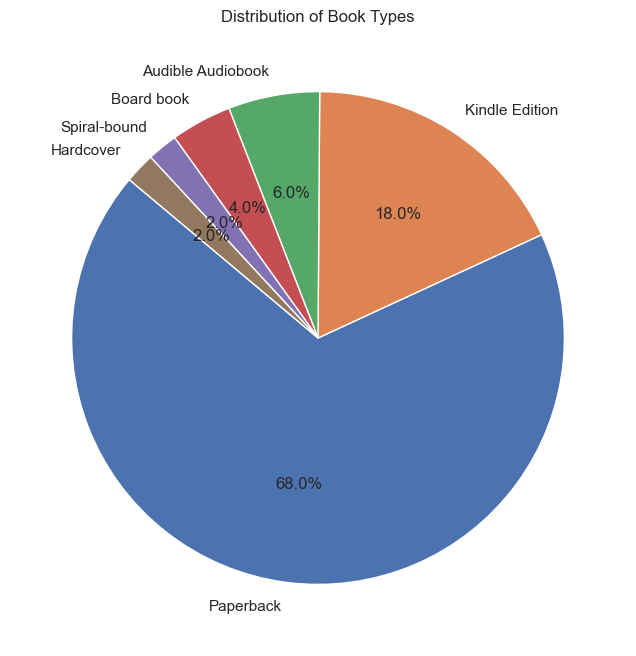

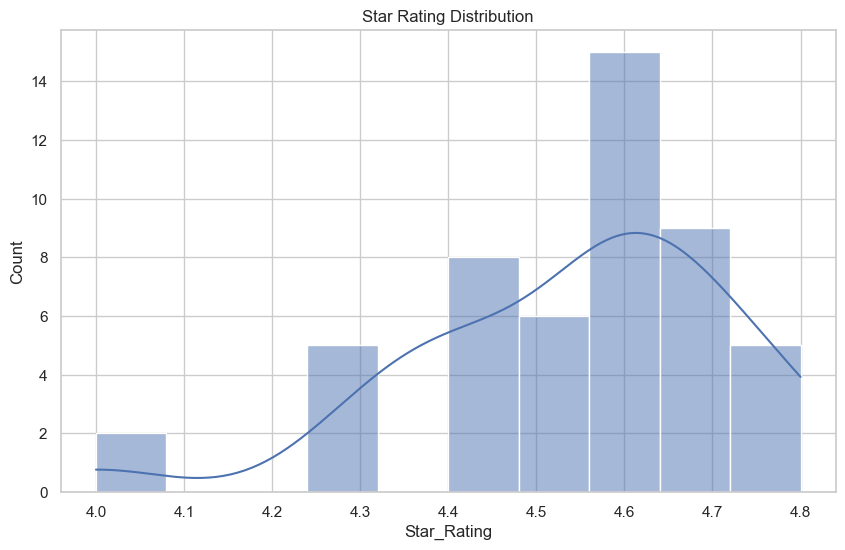

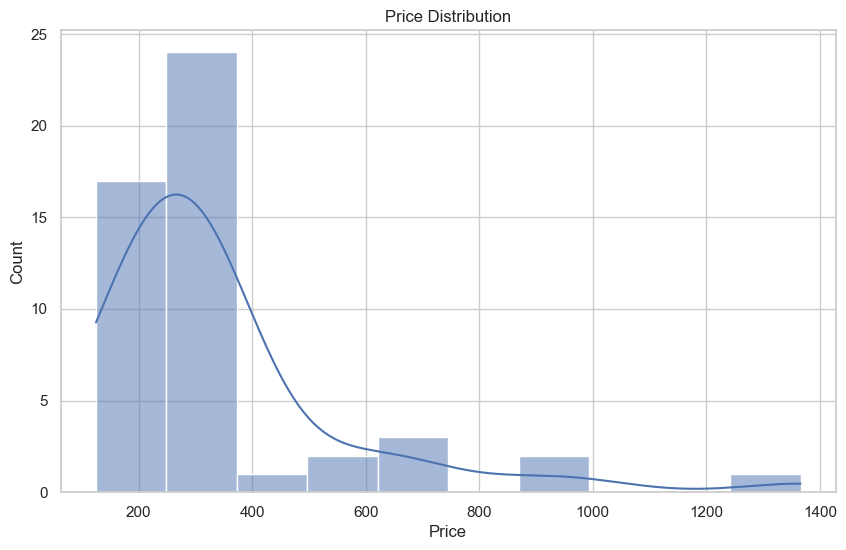

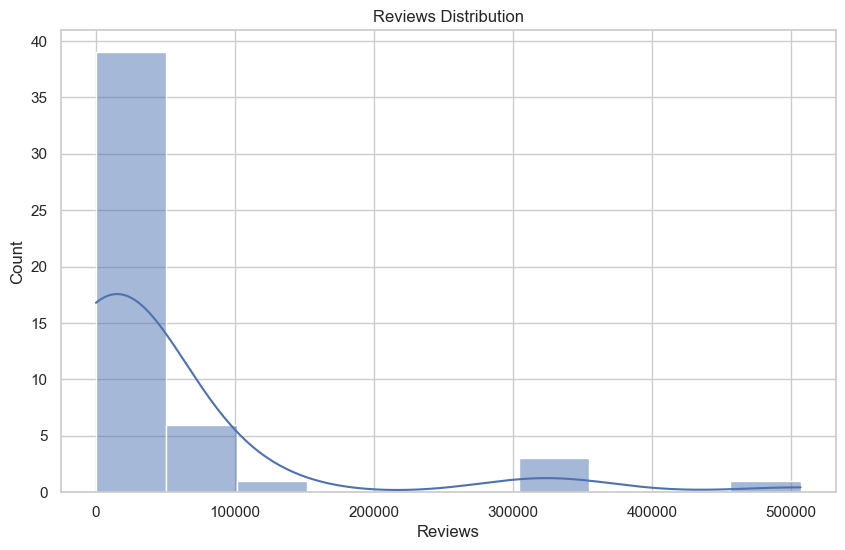

In [61]:
visualize_action_adventure_data(df_Action_Adventure)

#### Visualizing Computing, Internet & Digital Media book dataset

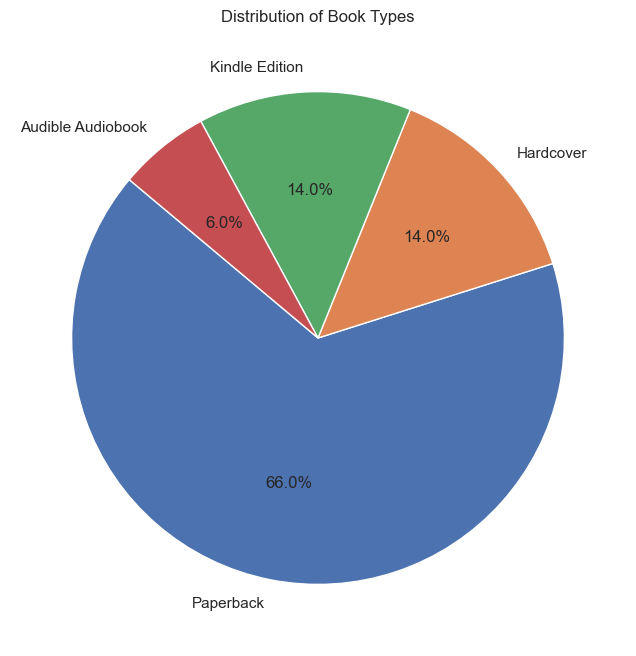

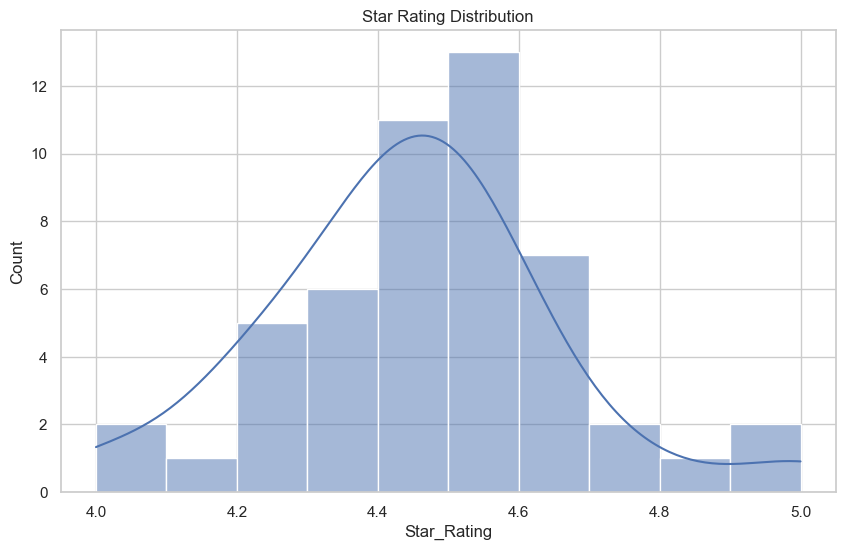

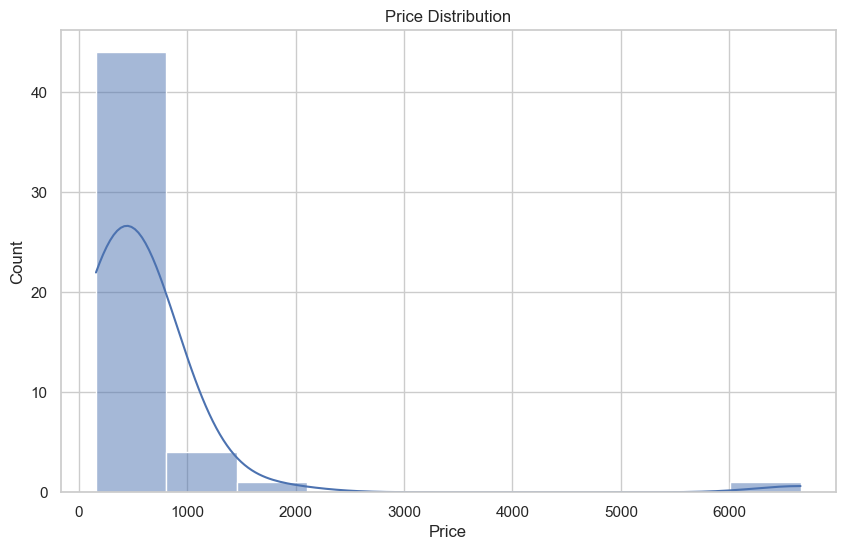

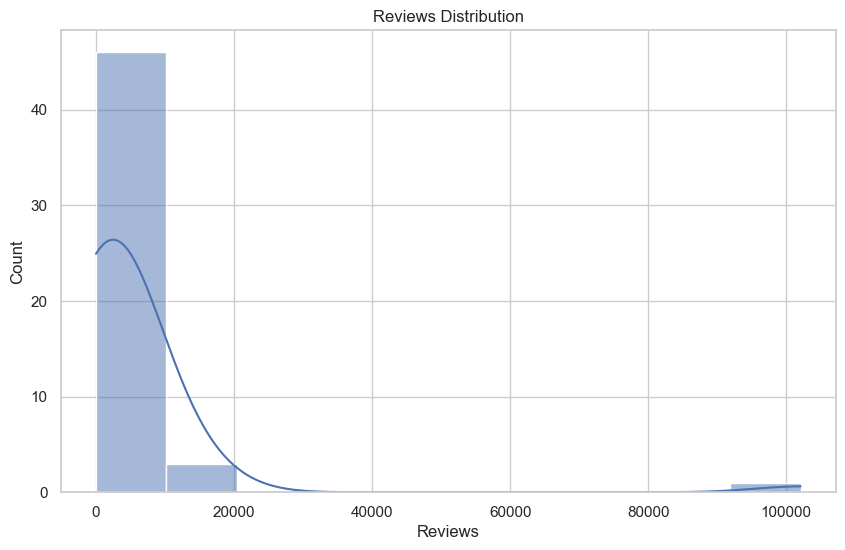

In [62]:
visualize_action_adventure_data(df_Computing_Internet)

#### Visualizing Historical book dataset

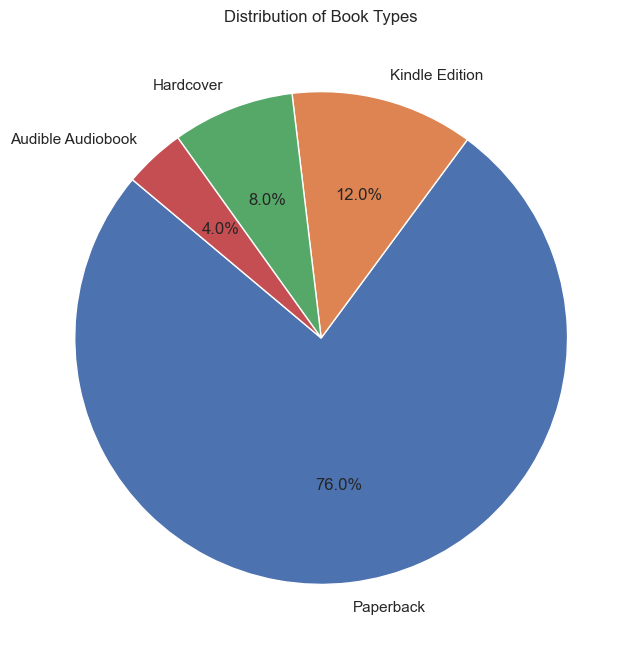

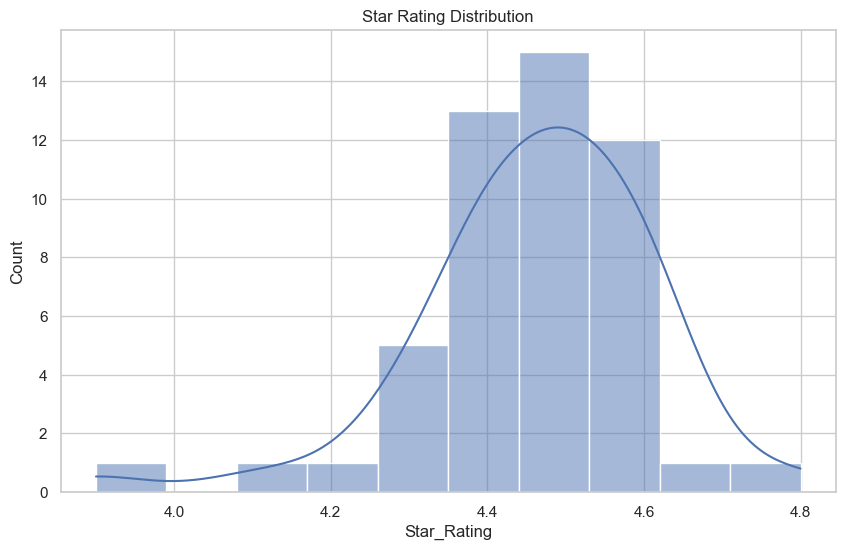

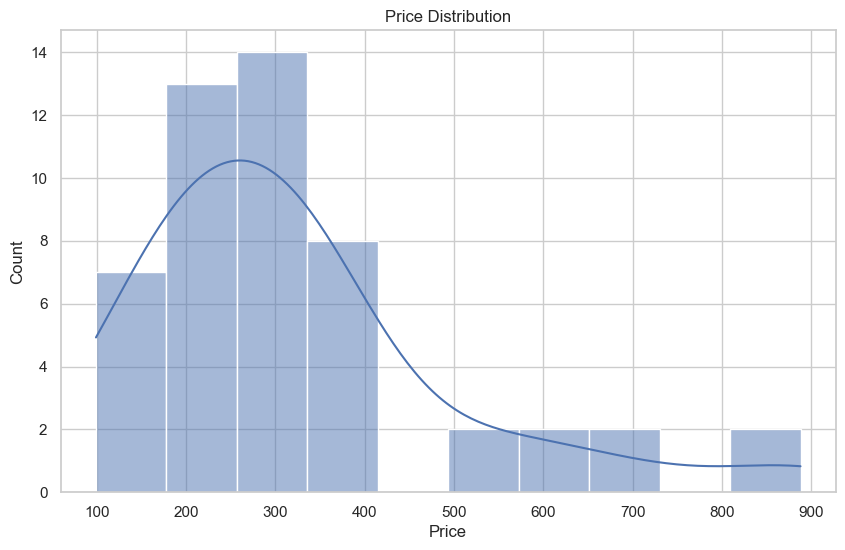

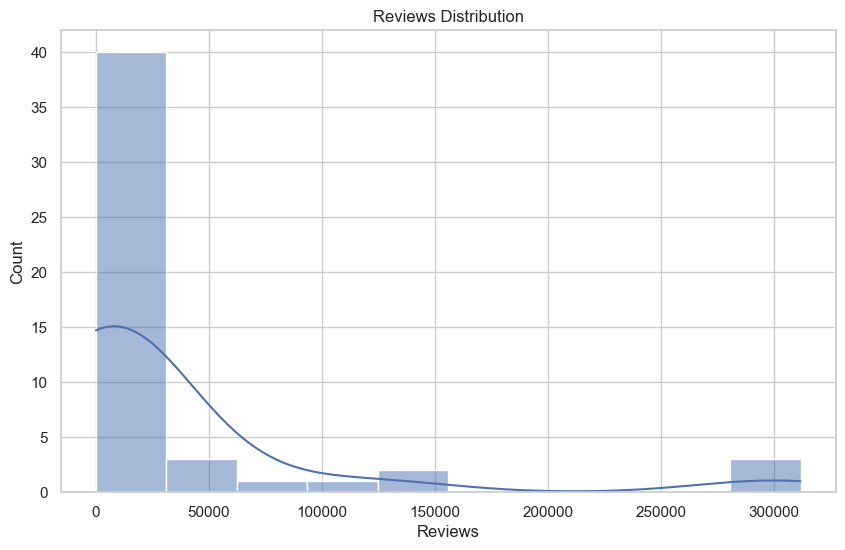

In [63]:
visualize_action_adventure_data(df_Historical_Fiction)

#### Visualizing Science & Mathematics book dataset

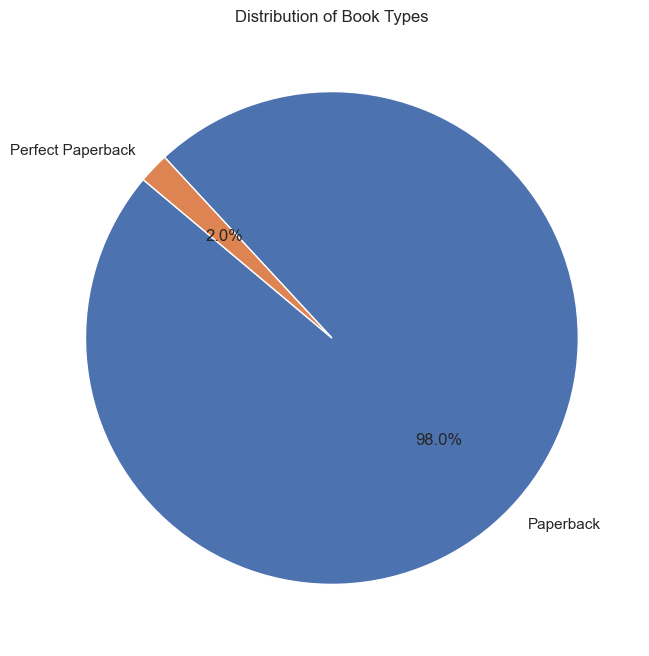

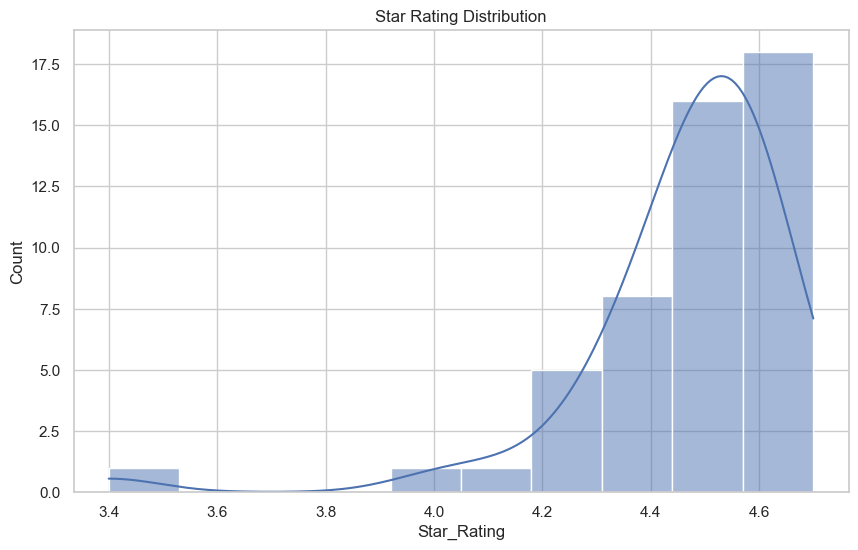

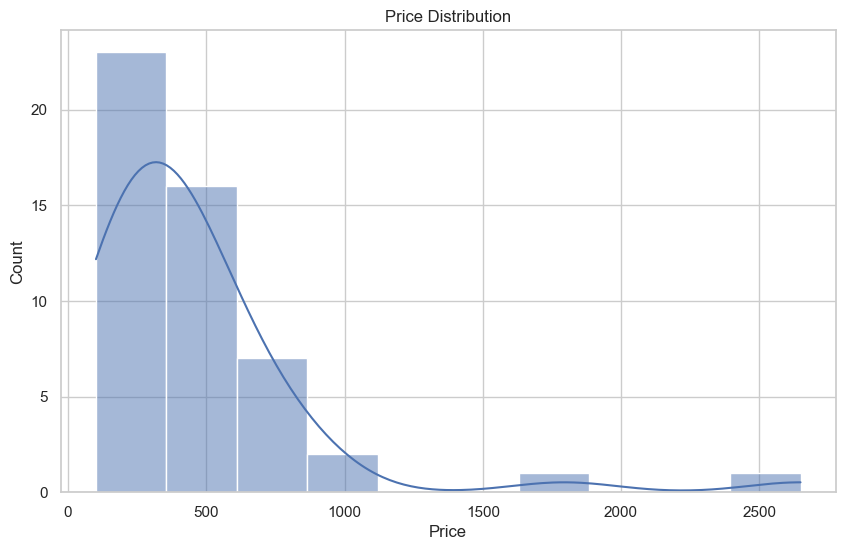

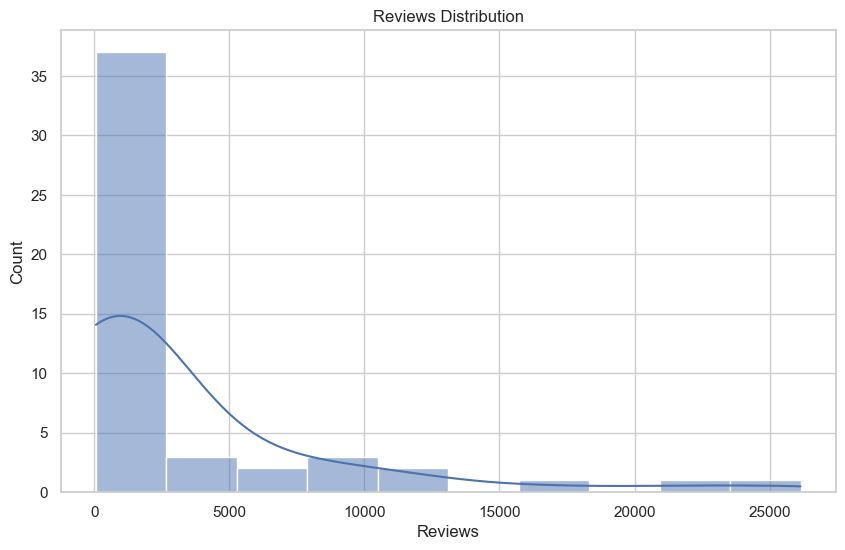

In [64]:
visualize_action_adventure_data(df_Science_Mathematics)

#### Visualizing Politics book dataset

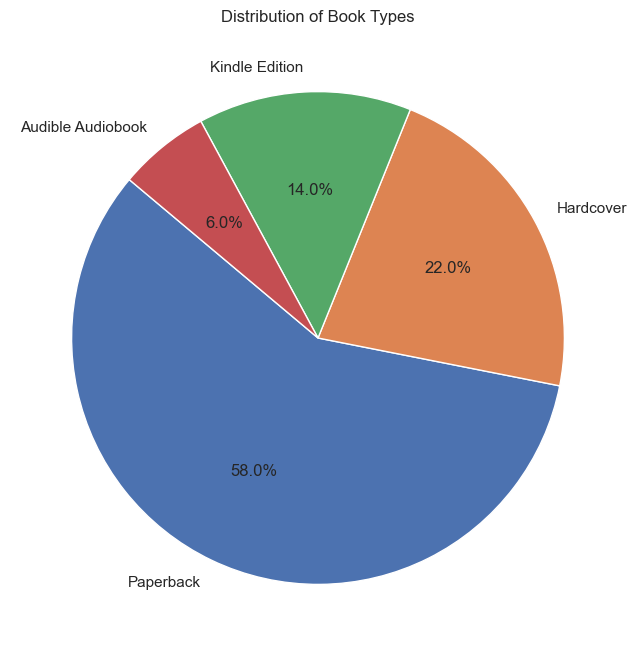

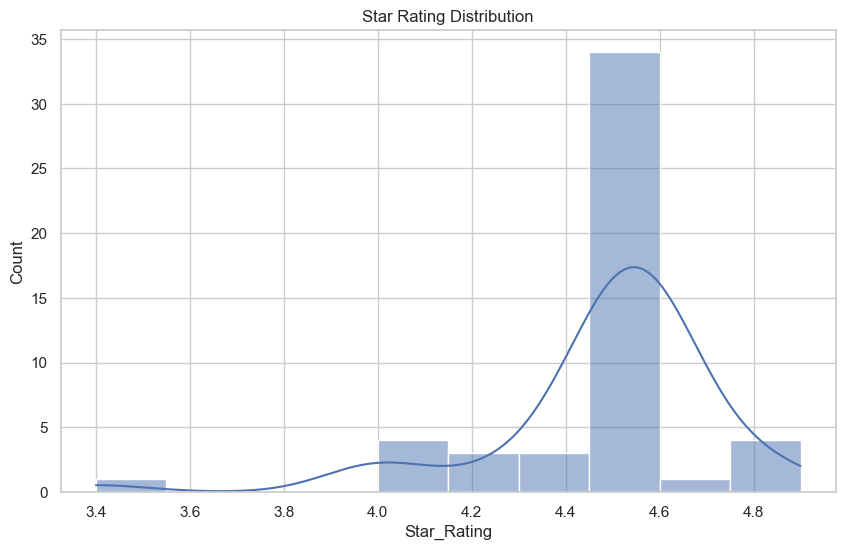

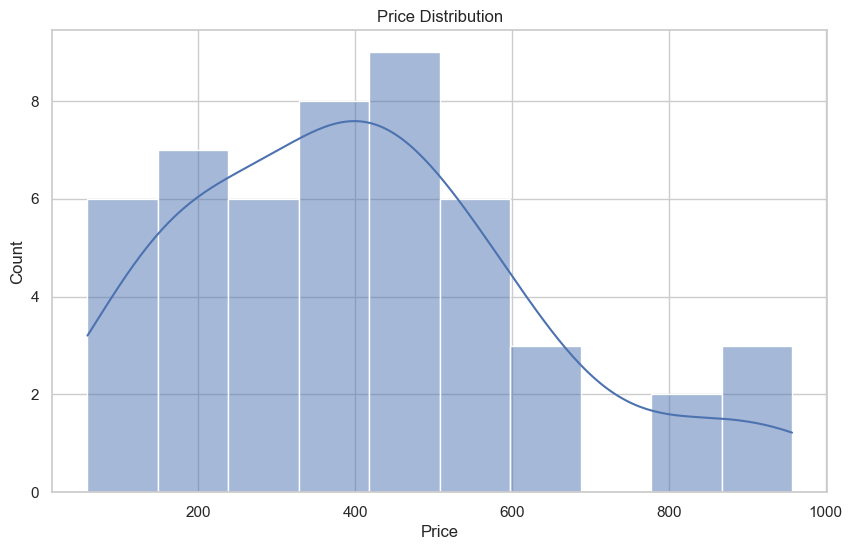

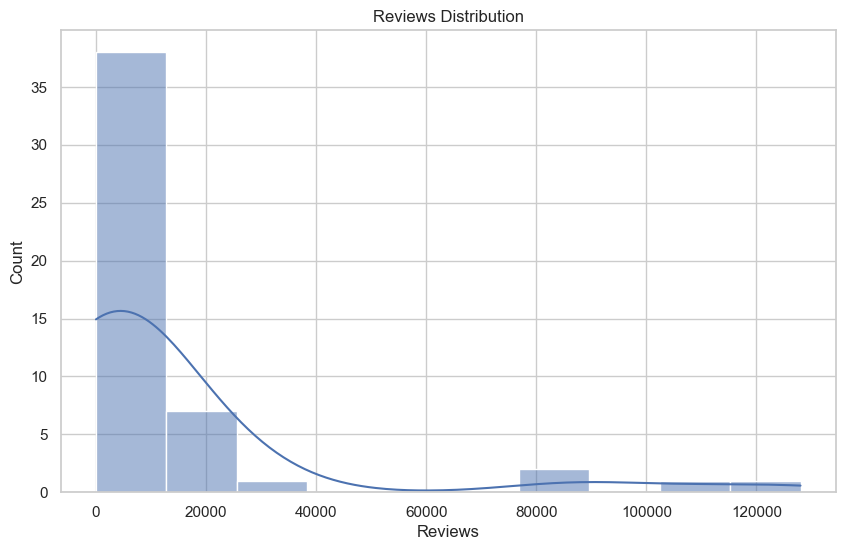

In [65]:
visualize_action_adventure_data(df_Politics)

## Combining all dataset to create single dataset for analysis purpose

In [66]:
df_Action_Adventure['Genre'] = 'Action & Adventure'
df_Computing_Internet['Genre'] = 'Computing, Internet & Digital Media'
df_Historical_Fiction['Genre'] = 'Historical'
df_Science_Mathematics['Genre'] = 'Science & Mathematics'
df_Politics['Genre'] = 'Politics'

df_combined = pd.concat([df_Action_Adventure, df_Computing_Internet, df_Historical_Fiction, 
                         df_Science_Mathematics, df_Politics], ignore_index=True)

In [67]:
df_combined.head()

,Book_Name,Author_Name,Book_Type,Price,Star_Rating,Reviews,Genre
0,Harry Potter and the Philosopher's Stone,J.K. Rowling,Kindle Edition,313,4.7,67162,Action & Adventure
1,"THE SILENT PATIENT [Paperback] Michaelides, Alex",Alex Michaelides,Paperback,255,4.5,318820,Action & Adventure
2,The Naga Warriors 1: Battle of Gokul Vol 1 | F...,Akshat Gupta,Paperback,184,4.6,296,Action & Adventure
3,"Samsara: Enter the Valley of the Gods (""India'...",Saksham Garg,Paperback,167,4.3,1475,Action & Adventure
4,The Hidden Hindu,Akshat Gupta,Paperback,220,4.4,4221,Action & Adventure


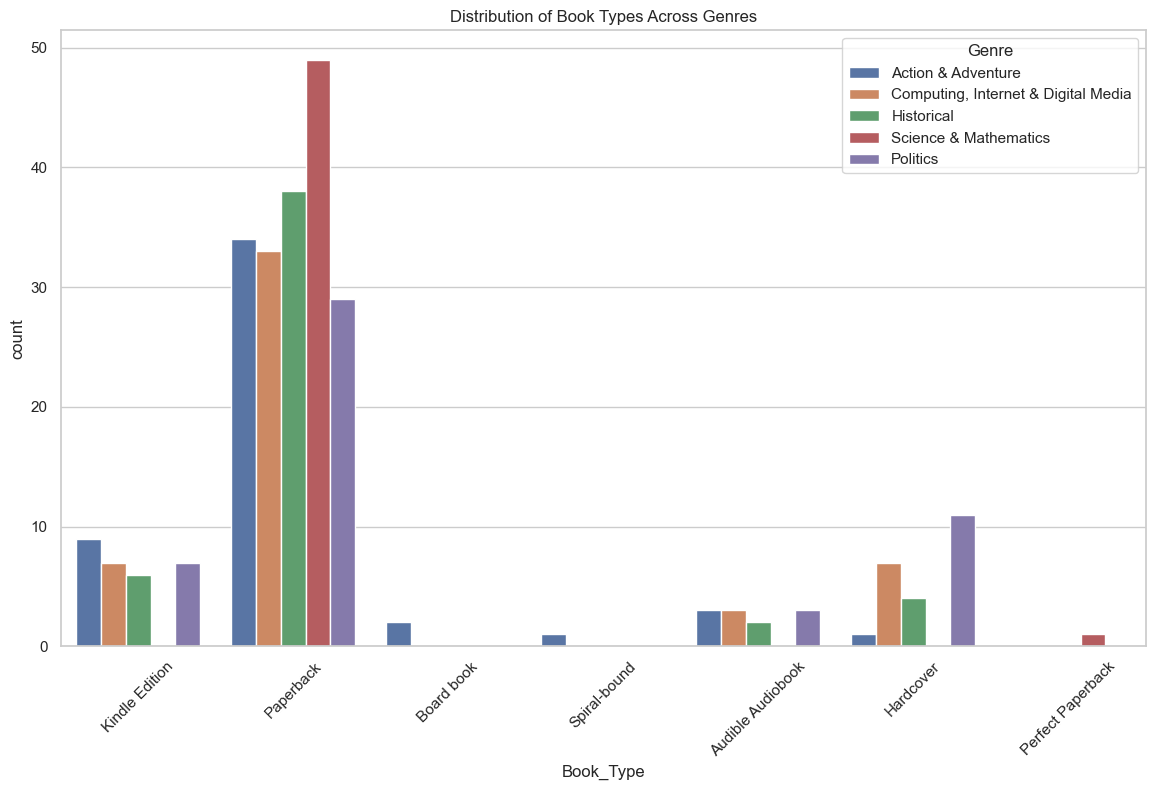

In [68]:
plt.figure(figsize=(14, 8))
sns.countplot(x='Book_Type', hue='Genre', data=df_combined)
plt.title('Distribution of Book Types Across Genres')
plt.xticks(rotation=45)
plt.show()


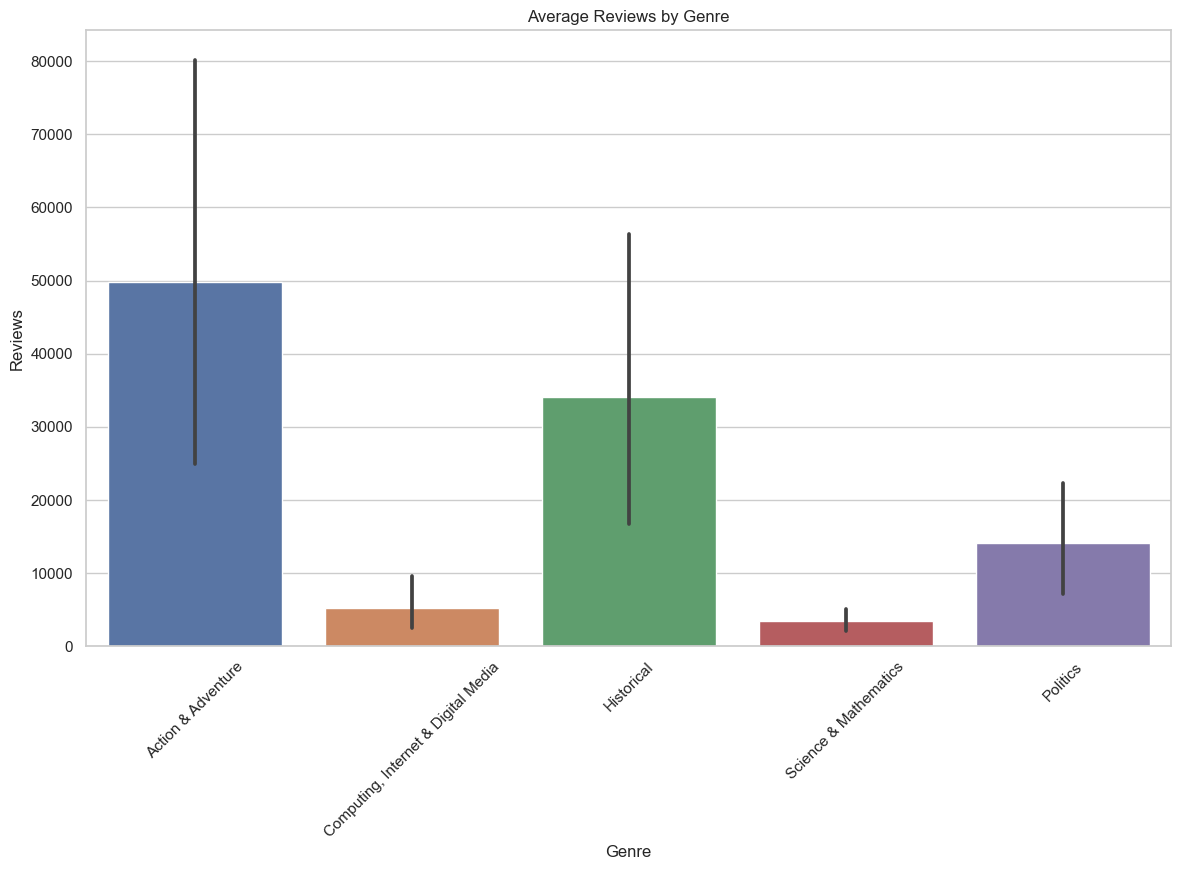

In [69]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Genre', y='Reviews', data=df_combined)
plt.title('Average Reviews by Genre')
plt.xticks(rotation=45)
plt.show()



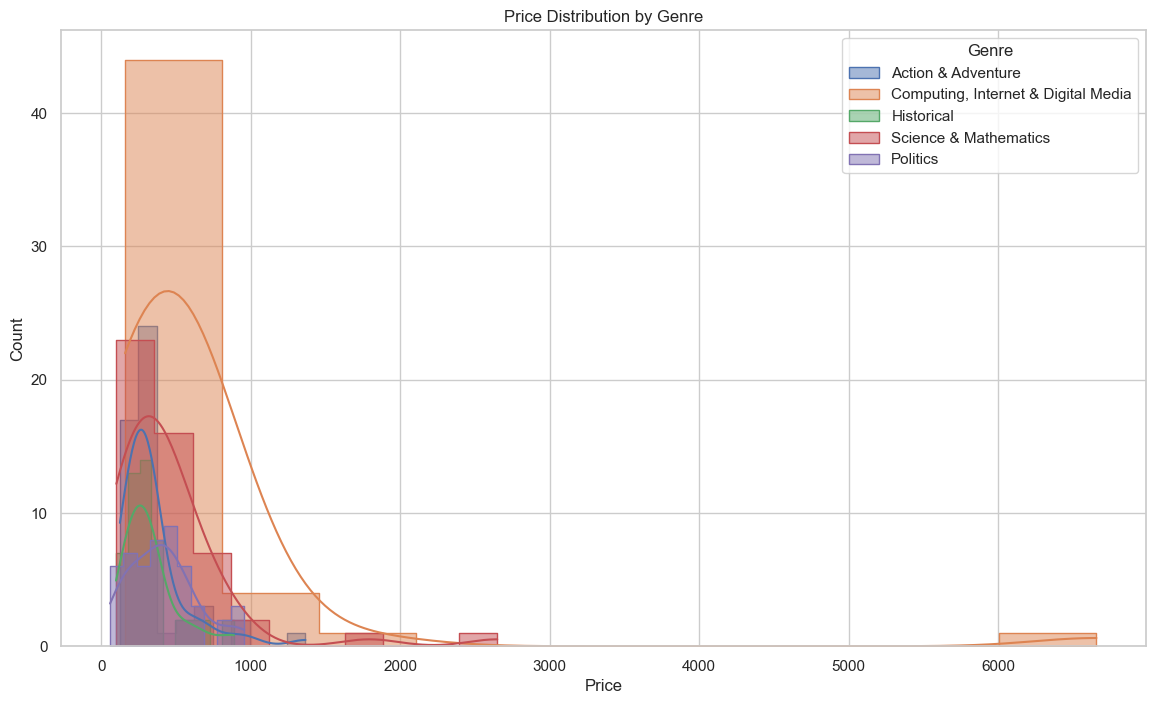

In [70]:
plt.figure(figsize=(14, 8))
for genre in df_combined['Genre'].unique():
    sns.histplot(df_combined[df_combined['Genre'] == genre]['Price'], kde=True, label=genre, bins=10, element='step')
plt.title('Price Distribution by Genre')
plt.legend(title='Genre')
plt.show()


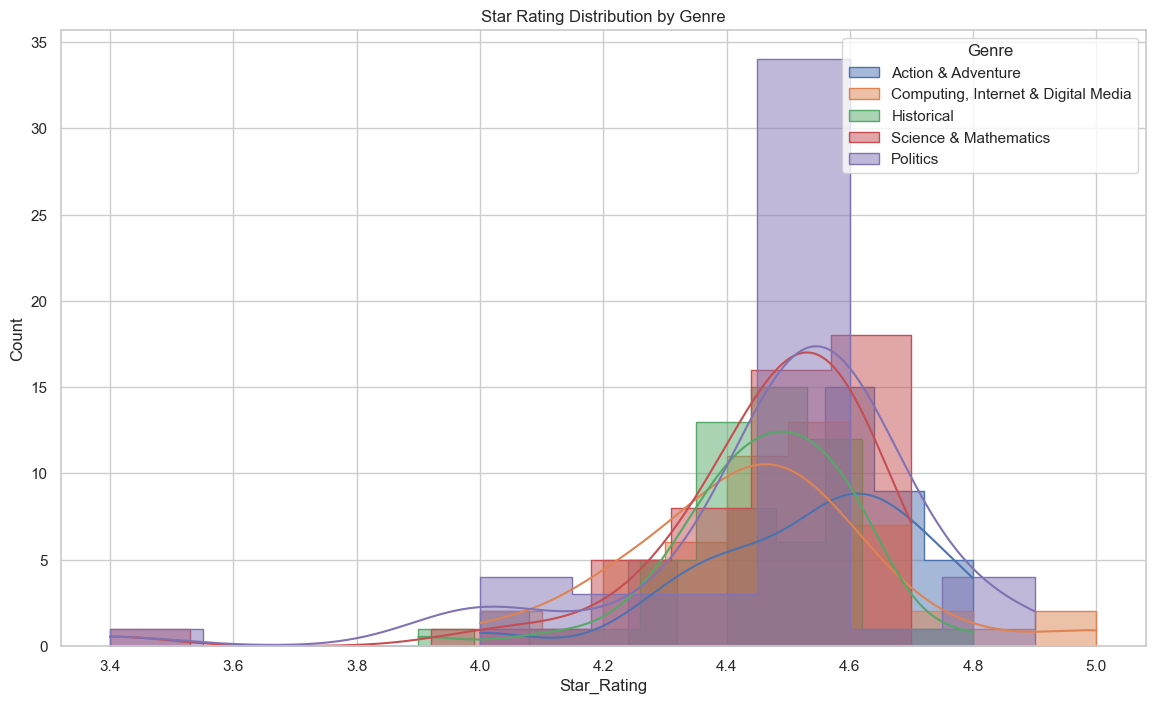

In [71]:
plt.figure(figsize=(14, 8))
for genre in df_combined['Genre'].unique():
    sns.histplot(df_combined[df_combined['Genre'] == genre]['Star_Rating'], kde=True, label=genre, bins=10, element='step')
plt.title('Star Rating Distribution by Genre')
plt.legend(title='Genre')
plt.show()
